<h1>Empleamos el ONI</h1>

In [7]:
#import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
#from tools import search_oni
import skimage
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

In [8]:
# Load data
data_oni = pd.read_csv('E:\Proyecto de Grado\Data\ONI_NOAA - copia.txt', sep="\s+")

# Create new columns
data_oni['TIME'] = pd.to_datetime(
    dict(year=data_oni["YR"], month=data_oni["MON"], day=1), format='%Y-%m')
data_oni['category'] = data_oni['ANOM'].apply(
    lambda x: 'Niño' if x >= 0.5 else 'Neutro' if x > -0.5 else 'Niña')

# Column to classify data by month and category
data_oni["month_anomaly"] = data_oni["MON"].astype(
    "str") + " " + data_oni["category"]
# Column month in str
months = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

"""for j in data_oni["MON"].values:
    if data_oni[j : "MON"] == 1:
        data_oni[j : "MONTH"] = "Enero"
    elif data_oni[j : "MON"] == 2:
        data_oni[j : "MONTH"] = "Febrero"
    elif data_oni[j : "MON"] == 3:
        data_oni[j : "MONTH"] = "Marzo"
    elif data_oni[j : "MON"] == 4:
        data_oni[j : "MONTH"] = "Abril"
    elif data_oni[j : "MON"] == 5:
        data_oni[j : "MONTH"] = "Mayo"
    elif data_oni[j : "MON"] == 6:
        data_oni[j : "MONTH"] = "Junio"
    elif data_oni[j : "MON"] == 7:
        data_oni[j : "MONTH"] = "Julio"
    elif data_oni[j : "MON"] == 8:
        data_oni[j : "MONTH"] = "Agosto"
    elif data_oni[j : "MON"] == 9:
        data_oni[j : "MONTH"] = "Septiembre"
    elif data_oni[j : "MON"] == 10:
        data_oni[j : "MONTH"] = "Octubre"
    elif data_oni[j : "MON"] == 11:
        data_oni[j : "MONTH"] = "Noviembre"
    elif data_oni[j : "MON"] == 12:
        data_oni[j : "MONTH"] = "Diciembre"""


data_oni

,YR,MON,TOTAL,ClimAdjust,ANOM,TIME,category,month_anomaly
0,1993,1,26.70,26.59,0.10,1993-01-01,Neutro,1 Neutro
1,1993,2,27.17,26.79,0.38,1993-02-01,Neutro,2 Neutro
2,1993,3,27.68,27.28,0.40,1993-03-01,Neutro,3 Neutro
3,1993,4,28.41,27.70,0.71,1993-04-01,Niño,4 Niño
4,1993,5,28.71,27.80,0.91,1993-05-01,Niño,5 Niño
...,...,...,...,...,...,...,...,...
331,2020,8,26.27,26.86,-0.59,2020-08-01,Niña,8 Niña
332,2020,9,25.89,26.72,-0.83,2020-09-01,Niña,9 Niña
333,2020,10,25.46,26.72,-1.25,2020-10-01,Niña,10 Niña
334,2020,11,25.28,26.70,-1.42,2020-11-01,Niña,11 Niña


In [9]:
ds_currents_month = xr.open_dataset(r'E:\Proyecto de Grado\Data\Nueva carpeta\corrientes_u_v_5m_enero1993_diciembre2020_month.nc')
ds_currents_month

<xarray.Dataset>
Dimensions:  (lon: 372, month: 336, lat: 205)
Coordinates:
  * lon      (lon) float32 -89.92 -89.83 -89.75 -89.67 ... -59.17 -59.08 -59.0
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float32 7.0 7.083 7.167 7.25 7.333 ... 23.75 23.83 23.92 24.0
Data variables:
    vo       (month, lat, lon) float32 ...
    uo       (month, lat, lon) float32 ...

In [10]:
ds_currents_month_anomaly = xr.open_dataset(r'E:\Proyecto de Grado\Data\Nueva carpeta\corrientes_month_anomaly.nc')
ds_currents_month_anomaly

<xarray.Dataset>
Dimensions:        (lon: 372, lat: 205, month_anomaly: 36)
Coordinates:
  * lon            (lon) float32 -89.92 -89.83 -89.75 ... -59.17 -59.08 -59.0
  * lat            (lat) float32 7.0 7.083 7.167 7.25 ... 23.75 23.83 23.92 24.0
  * month_anomaly  (month_anomaly) object '1 Neutro' '1 Niña' ... '9 Niño'
Data variables:
    vo             (month_anomaly, lat, lon) float32 ...
    uo             (month_anomaly, lat, lon) float32 ...

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


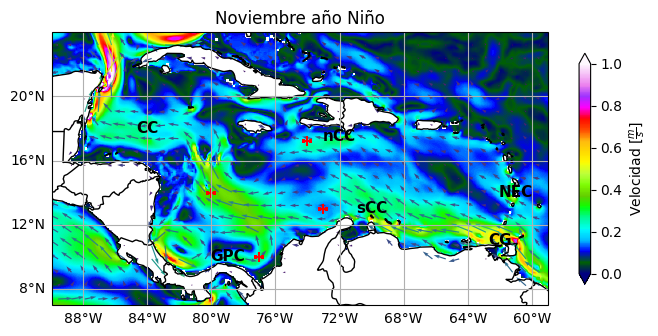

In [72]:
ds_ciclos = ds_currents_month_anomaly.where(ds_currents_month_anomaly['month_anomaly'] == "11 Niño")
lat = ds_ciclos['lat'].to_numpy()
lon = ds_ciclos['lon'].to_numpy()
V = ds_ciclos["vo"].mean(dim=["month_anomaly"]).to_numpy()
U = ds_ciclos["uo"].mean(dim=["month_anomaly"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Noviembre año Niño")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mapas ONI\Niño\Noviembre_año _Niño.png", dpi = 1000, bbox_inches = 'tight')


In [12]:
"""for i in ds_currents_month_anomaly["month_anomaly"].values:   
    ds_ciclo = ds_currents_month_anomaly.where(ds_currents_month_anomaly['month_anomaly'] == i)
    lat = ds_ciclo['lat'].to_numpy()
    lon = ds_ciclo['lon'].to_numpy()
    V = ds_ciclo["vo"].mean(dim=["month_anomaly"]).to_numpy()
    U =     ds_ciclo["uo"].mean(dim=["month_anomaly"]).to_numpy()

    X, Y = np.meshgrid(lon, lat)

    x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
    y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
    u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
    v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

    # Crea una figura y ejes con la proyección de latitud y longitud
    fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    loc = ticker.MultipleLocator(4)

    # Agrega el mapa base (costas, límites de países, etc.)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)

    #genera una capa raster
    # Usa origin='lower' para mostrar los datos correctamente
    # Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
    R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
            cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

    # Crea el gráfico de vectores
    Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

    # Agrega una barra de color asociada a la magnitud de los vectores
    plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5)

    # Establece los límites del mapa y etiquetas de los ejes
    ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

    # Muestra el mapa
    plt.title(f"Velocidades de Corrientes superficiales de {i}")
    plt.show()"""


'for i in ds_currents_month_anomaly["month_anomaly"].values:   \n    ds_ciclo = ds_currents_month_anomaly.where(ds_currents_month_anomaly[\'month_anomaly\'] == i)\n    lat = ds_ciclo[\'lat\'].to_numpy()\n    lon = ds_ciclo[\'lon\'].to_numpy()\n    V = ds_ciclo["vo"].mean(dim=["month_anomaly"]).to_numpy()\n    U =     ds_ciclo["uo"].mean(dim=["month_anomaly"]).to_numpy()\n\n    X, Y = np.meshgrid(lon, lat)\n\n    x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)\n    y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)\n    u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)\n    v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)\n\n    # Crea una figura y ejes con la proyección de latitud y longitud\n    fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={\'projection\': ccrs.PlateCarree()})\n    loc = ticker.MultipleLocator(4)\n\n    # Agrega el mapa base (costas, límites de países, etc.)\n    ax.add_feature(cf.COASTLINE)\n    ax.add_feature(cf.BORDERS)\n\n